In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Data\WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


## Basic Statistics

In [6]:
df.shape

(1143, 13)

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


## Visual Exploration

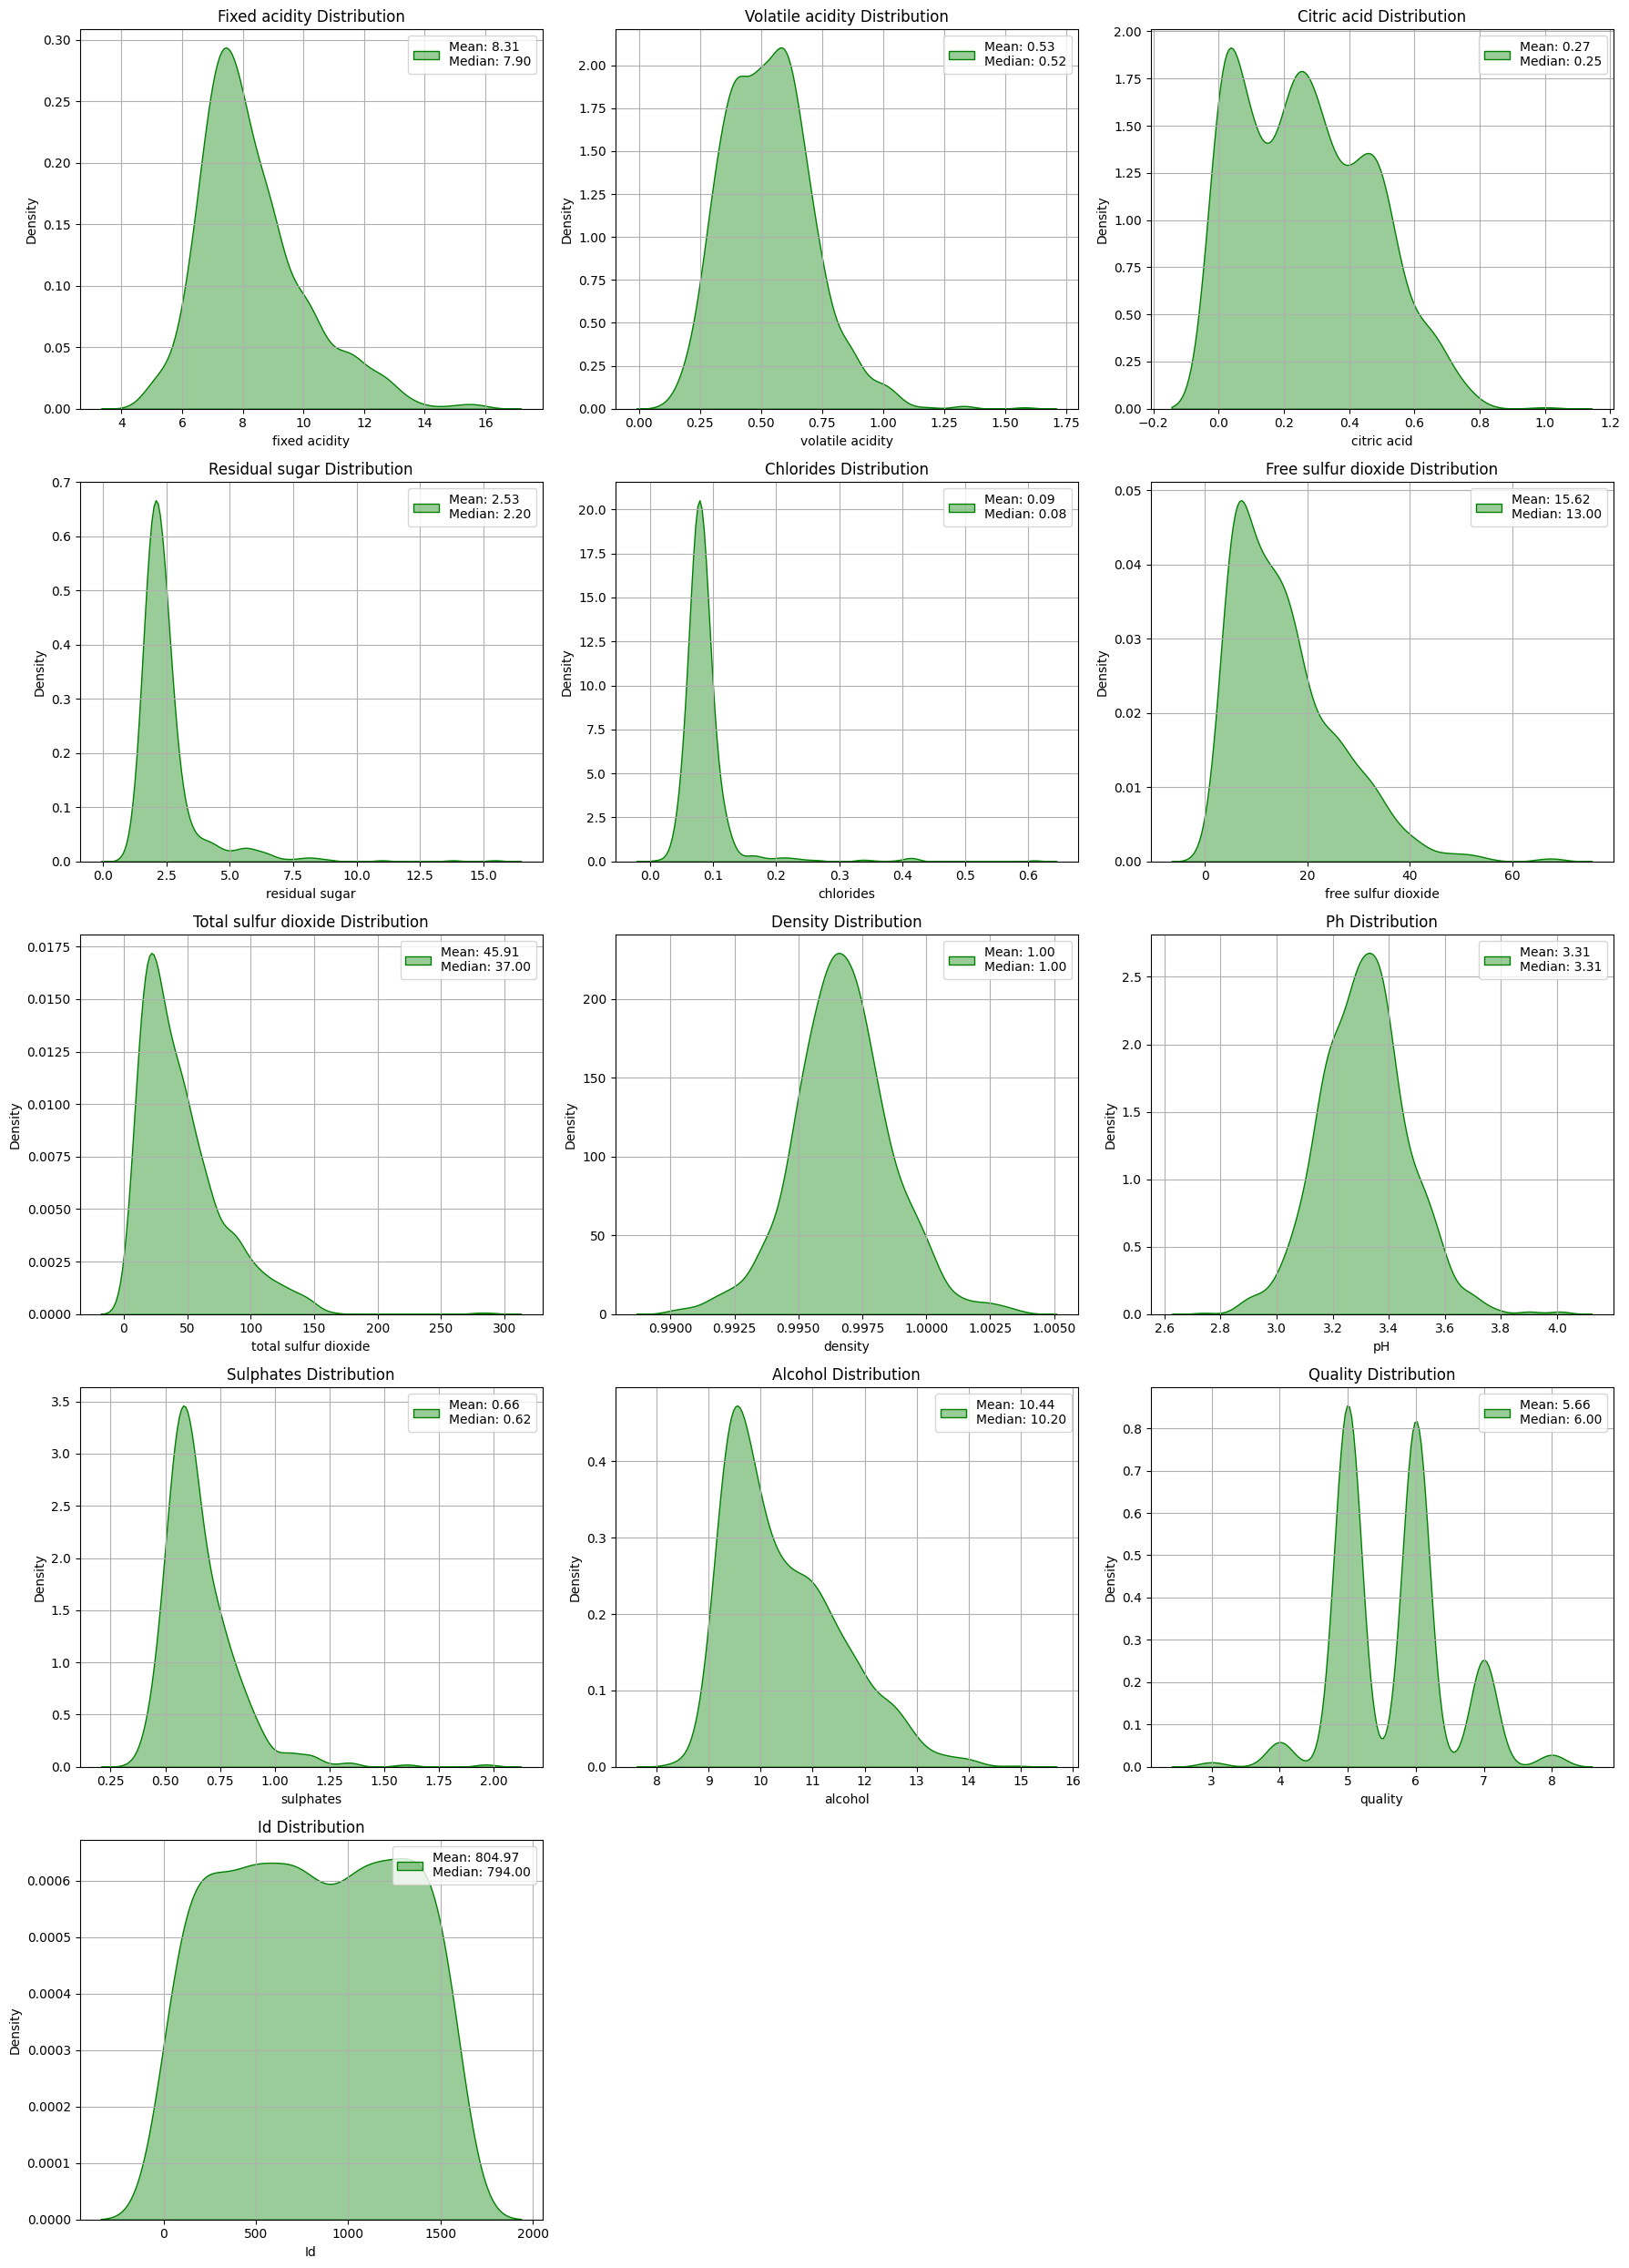

In [33]:
import math

cols = df.select_dtypes(include='number').columns
n = len(cols)
fig, axes = plt.subplots(math.ceil(n / 3), 3, figsize=(18, 5 * math.ceil(n / 3)))
axes = axes.flatten()

for i, col in enumerate(cols):
    data = df[col].dropna()  

    # Calculate statistics
    mean_val = data.mean()
    median_val = data.median()

    # Plot KDE
    sns.kdeplot(data, fill=True, color='green', alpha=0.4, ax=axes[i], label=f'Mean: {mean_val:.2f}\nMedian: {median_val:.2f}')
    
    # Set plot title, grid, and legend
    axes[i].set_title(f'{col.capitalize()} Distribution')
    axes[i].grid(True)
    axes[i].legend(loc='upper right')

# Hide any unused subplots
for ax in axes[n:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


## Feature Engineering

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [79]:
X = df.drop(columns=['quality'])
y = df.iloc[:, -1]
# X_scaled = scaler.fit_transform(X)

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(914, 12) (914,)
(229, 12) (229,)


## Model Building

In [82]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [83]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [84]:
acc_lin_reg = lin_reg.score(X_test, y_test)
print("Accuracy of Linear Regression:", round(acc_lin_reg*100, 2))

Accuracy of Linear Regression: 100.0


In [93]:
# DecisionTreeRegressor
dec_tree = DecisionTreeRegressor(max_depth=10, random_state=42)
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [94]:
acc_dec_tree = dec_tree.score(X_test, y_test)
print("Accuracy of Decision Tree Regressor:", round(acc_dec_tree*100, 2))

Accuracy of Decision Tree Regressor: 99.99


In [101]:
# RandomForestRegressor
rf_reg = RandomForestRegressor(max_depth=5, random_state=42)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [102]:
print("Accuracy of Random Forest Regressor:", round(rf_reg.score(X_test, y_test)*100, 2))

Accuracy of Random Forest Regressor: 99.99


In [103]:
# GradientBoostingRegressor
grad_boost = GradientBoostingRegressor()
grad_boost.fit(X_train, y_train)

GradientBoostingRegressor()

In [104]:
print("Accuracy of Gradient Boosting Regressor:", round(grad_boost.score(X_test, y_test)*100, 2))

Accuracy of Gradient Boosting Regressor: 99.99


In [105]:
# KNeighborsRegressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [106]:
print("Accuracy of KNeighbors Regressor:", round(knn_reg.score(X_test, y_test)*100, 2))

Accuracy of KNeighbors Regressor: 99.99


In [107]:
model = rf_reg

In [ ]:
import pickle as pk
filename = 'model\wine_quality_model.pkl'
pk.dump(model, open(filename, 'wb'))